In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00
time: 389 µs (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
#import the required headers
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt

time: 463 µs (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
time_range = [1,2,3,4]
battery_solution = []
pso_solution = []
minimum_array =[]

time: 721 µs (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
#we need 4 seperate values for different times.
def find_function(O, time_of_day):
  a = math.floor(O[0])
  b = math.floor(O[1])
  c = math.floor(O[2])
  d = math.floor(O[3])
  if time_of_day == 1:
    return ((a*120*10.7*(40/60)) + (b*80*10.7*(60/60)) + (c*60*10.7*(70/60)) + (d*40*10.7*(90/60)))
  elif time_of_day == 2:
    return ((a*120*8.23*(40/60)) + (b*80*8.23*(60/60)) + (c*60*8.23*(70/60)) + (d*40*8.23*(90/60)))
  elif time_of_day == 3:
    return ((a*120*10.7*(40/60)) + (b*80*10.7*(60/60)) + (c*60*10.7*(70/60)) + (d*40*10.7*(90/60)))
  else:
    return ((a*120*4.94*(40/60)) + (b*80*4.94*(60/60)) + (c*60*4.94*(70/60)) + (d*40*4.94*(90/60)))

time: 1.25 ms (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
def find_number_of_orders(time_of_day):
  if time_of_day == 1:
    return 25
  elif time_of_day == 2:
    return 25
  elif time_of_day == 3:
    return 25
  else:
    return 25

time: 490 µs (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
def objective_function(O):
    a = math.floor(O[0])
    b = math.floor(O[1])
    c = math.floor(O[2])
    d = math.floor(O[3])

    linear_constraint = a+b+c+d

    if linear_constraint == find_number_of_orders(time_of_day):
        penalty = 0
    else:
        penalty = 100000

    z = find_function(O, time_of_day) + penalty
    return z

time: 653 µs (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
bounds = [(0, 10), (0, 10), (0, 10), (0, 10)]
nv = 4;
mm = -1

time: 576 µs (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
particle_size = 40  # number of particles
iterations = 200  # max number of iterations
w = 0.65  # inertia constant
c1 = 2  # cognative constant
c2 = 2  # social constant

time: 568 µs (started: 2023-04-10 10:32:01 +00:00)


Text(0, 0.5, 'Objective function')

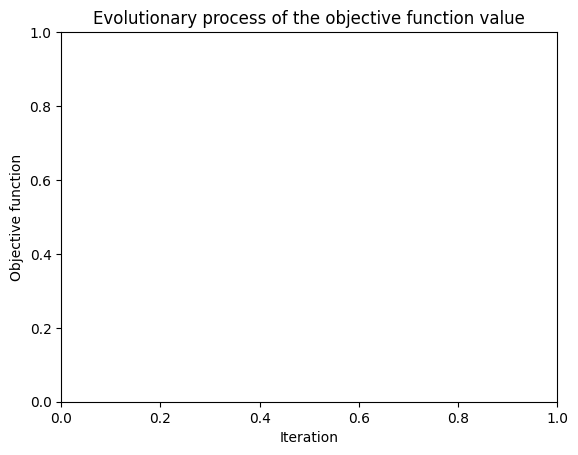

time: 295 ms (started: 2023-04-10 10:32:01 +00:00)


In [ ]:
#Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
plt.title('Evolutionary process of the objective function value')
plt.xlabel("Iteration")
plt.ylabel("Objective function")

In [ ]:
class Particle:
    def __init__(self, bounds):
        self.particle_position = [] # particle position
        self.particle_velocity = [] # particle velocity
        self.local_best_particle_position = [] # best position of the popticle
        self.fitness_local_best_particle_position = initial_fitness
        self.fitness_particle_position = initial_fitness
        for i in range(nv):
            self.particle_position.append(np.random.randint(bounds[i][0], bounds [i][1]+1))
            self.particle_velocity.append(np.random.randint(-10, 11))

    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position # update the fit
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position # update the fit

    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()

            cognitive_velocity = math.floor(c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i]))
            social_velocity = math.floor(c2 * r2 * (global_best_particle_position[i] - self.particle_position[i]))
            self.particle_velocity[i] = math.floor(w * self.particle_velocity[i] + cognitive_velocity + social_velocity)


    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]

            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]

            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]

time: 1.83 ms (started: 2023-04-10 10:32:02 +00:00)


In [ ]:
class PSO:
    def __init__ (self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range (particle_size):
            swarm_particle.append(Particle(bounds))
        A = []

        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)

                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)

            A.append(fitness_global_best_particle_position)
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=i - iterations, right=i + 3)
            time.sleep(0.01)

        y = np.arange(200)
        plt.plot(y, A)
        plt.show()
        print ('RESULT:')
        print ('Optimal solution:', global_best_particle_position)
        print ('Objective function value:', fitness_global_best_particle_position)
        minimum_array.append(A)
        battery_solution.append(global_best_particle_position)
        pso_solution.append(fitness_global_best_particle_position)


time: 1.83 ms (started: 2023-04-10 10:32:02 +00:00)


In [ ]:
if mm == -1:
    initial_fitness = float("inf")
if mm == 1:
    initial_fitness = -float("inf")

time: 375 µs (started: 2023-04-10 10:32:02 +00:00)


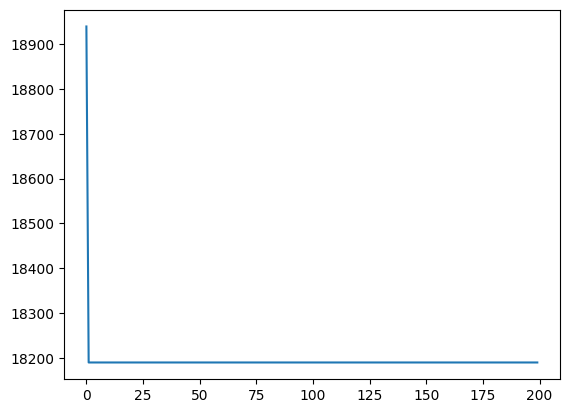

RESULT:
Optimal solution: [2, 3, 10, 10]
Objective function value: 18190.0


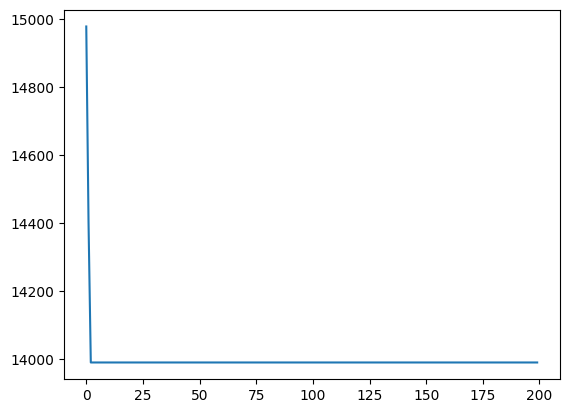

RESULT:
Optimal solution: [0, 5, 10, 10]
Objective function value: 13991.0


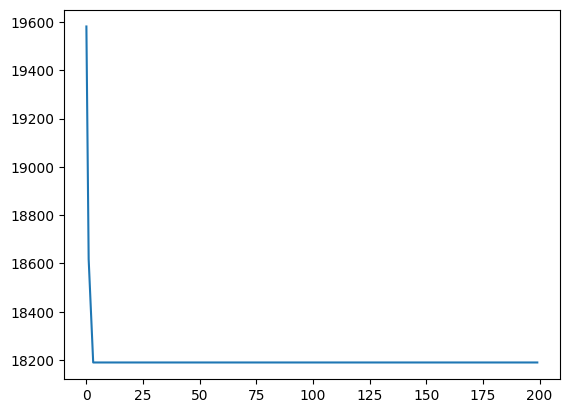

RESULT:
Optimal solution: [4, 1, 10, 10]
Objective function value: 18190.0


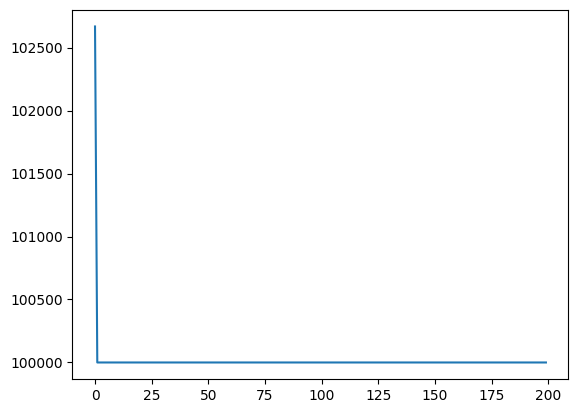

RESULT:
Optimal solution: [0, 0, 0, 0]
Objective function value: 100000.0
time: 1min 16s (started: 2023-04-10 10:32:02 +00:00)


In [ ]:
for time_of_day in time_range:
  PSO(objective_function, bounds, particle_size, iterations)

In [ ]:
slow_chargers =[]
medium_chargers =[]
fast_chargers=[]
superfast_chargers=[]

slow_chargers.append(5)
slow_chargers.append(6)
slow_chargers.append(7)
slow_chargers.append(5)

medium_chargers.append(10)
medium_chargers.append(4)
medium_chargers.append(9)
medium_chargers.append(8)

fast_chargers.append(5)
fast_chargers.append(9)
fast_chargers.append(5)
fast_chargers.append(6)

superfast_chargers.append(5)
superfast_chargers.append(6)
superfast_chargers.append(4)
superfast_chargers.append(6)



time: 1.41 ms (started: 2023-04-10 10:33:18 +00:00)


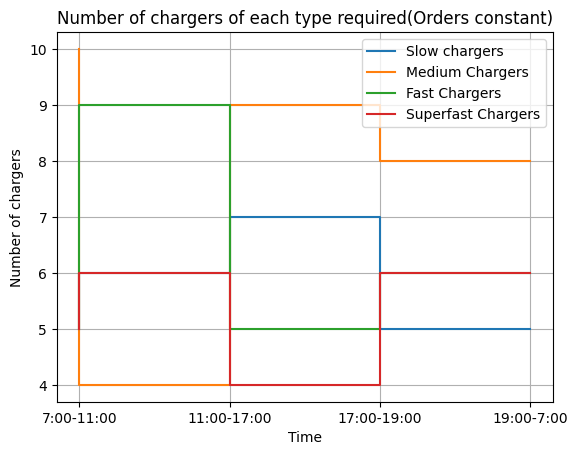

time: 246 ms (started: 2023-04-10 10:33:18 +00:00)


In [ ]:
x = [0, 1, 2, 3]
ticks = ["7:00-11:00", "11:00-17:00", "17:00-19:00", "19:00-7:00"]
plt.xticks(x, ticks)
plt.step(x, slow_chargers,label="Slow Chargers")
plt.step(x, medium_chargers,label="Medium Chargers")
plt.step(x, fast_chargers,label="Fast Chargers")
plt.step(x, superfast_chargers,label="Superfast Chargers")
plt.xlabel('Time')
plt.ylabel('Number of chargers')
plt.title('Number of chargers of each type required(Orders constant)')

plt.legend(['Slow chargers', 'Medium Chargers', 'Fast Chargers', 'Superfast Chargers'], loc='upper right')
plt.grid()
plt.show()

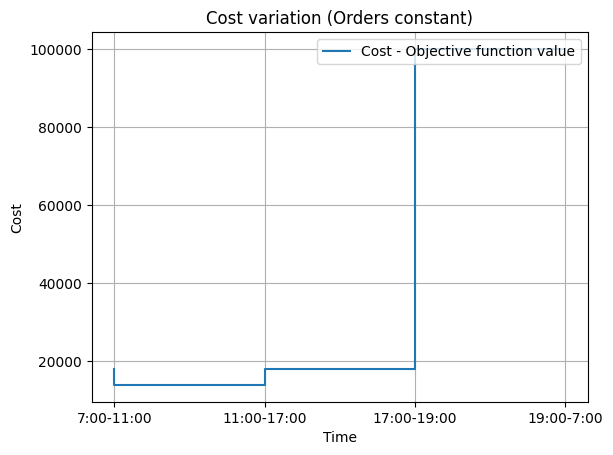

time: 243 ms (started: 2023-04-10 10:33:19 +00:00)


In [ ]:
x = [0, 1, 2, 3]
ticks = ["7:00-11:00", "11:00-17:00", "17:00-19:00", "19:00-7:00"]
plt.xticks(x, ticks)
plt.step(x, pso_solution)
plt.xlabel('Time')
plt.ylabel('Cost')
plt.title('Cost variation (Orders constant)')
plt.grid()
plt.legend(["Cost - Objective function value"],loc="upper right")

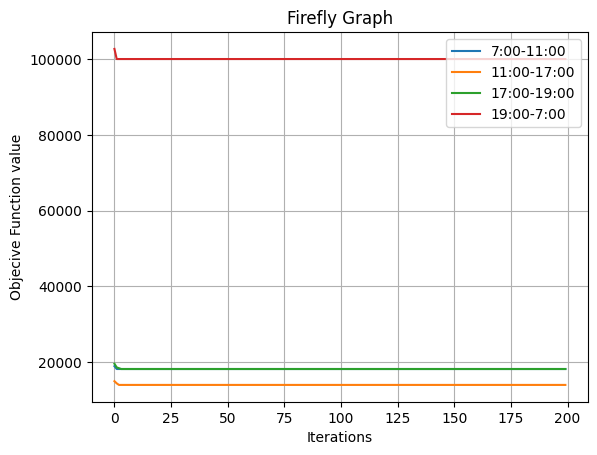

time: 331 ms (started: 2023-04-10 10:33:19 +00:00)


In [ ]:
y = np.arange(200)
t1 = minimum_array[0]
t2 = minimum_array[1]
t3 = minimum_array[2]
t4 = minimum_array[3]

plt.plot(y, t1)
plt.plot(y, t2)
plt.plot(y, t3)
plt.plot(y, t4)
plt.xlabel('Iterations')
plt.ylabel('Objecive Function value')
plt.title('Firefly Graph')
plt.legend(["7:00-11:00", "11:00-17:00", "17:00-19:00", "19:00-7:00"],loc="upper right")
plt.grid()

In [2]:
#power variation in the day
total_power = []
total_power.append(slow_chargers[0]*40 + medium_chargers[0]*60 + fast_chargers[0]*80 + superfast_chargers[0]*120)
total_power.append(slow_chargers[1]*40 + medium_chargers[1]*60 + fast_chargers[1]*80 + superfast_chargers[1]*120)
total_power.append(slow_chargers[2]*40 + medium_chargers[2]*60 + fast_chargers[2]*80 + superfast_chargers[2]*120)
total_power.append(slow_chargers[3]*40 + medium_chargers[3]*60 + fast_chargers[3]*80 + superfast_chargers[3]*120)

x = [0, 1, 2, 3]
ticks = ["7:00-11:00", "11:00-17:00", "17:00-19:00", "19:00-7:00"]
plt.xticks(x, ticks)
plt.step(x, total_power)
plt.xlabel('Time')
plt.ylabel('Output Power')
plt.title('Power variation (Orders varied)')
plt.grid()
plt.legend(["Output Power"],loc="upper right")


time: 258 ms (started: 2023-04-10 10:33:19 +00:00)
